<a href="https://colab.research.google.com/github/vandit98/-arcader/blob/main/spaceship_titanic_decision_tree__regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

In [143]:
dataset=pd.read_csv("train.csv")
dataset2=pd.read_csv("test.csv")
dataset3=pd.read_csv("sample_submission.csv")
y_test=dataset3.iloc[:,[1]]
print(y_test.head())
def f(s):
    if(s==False):
        return 0
    else:
       return 1
y_test['Transported']=y_test.Transported.apply(f)
# y_test=y_test.apply(f)

     Transported
0          False
1          False
2          False
3          False
4          False
..           ...
295        False
296        False
297        False
298        False
299        False

[300 rows x 1 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [113]:
y_test.head(30)

,Transported
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [114]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [115]:
dataset.shape

(8693, 14)

In [116]:
dataset.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [117]:
dataset2.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
5,0027_01,Earth,False,F/7/P,TRAPPIST-1e,31.0,False,0.0,1615.0,263.0,113.0,60.0,Karlen Ricks
6,0029_01,Europa,True,B/2/P,55 Cancri e,21.0,False,0.0,NaN,0.0,0.0,0.0,Aldah Ainserfle
7,0032_01,Europa,True,D/0/S,TRAPPIST-1e,20.0,False,0.0,0.0,0.0,0.0,0.0,Acrabi Pringry
8,0032_02,Europa,True,D/0/S,55 Cancri e,23.0,False,0.0,0.0,0.0,0.0,0.0,Dhena Pringry
9,0033_01,Earth,False,F/7/S,55 Cancri e,24.0,False,0.0,639.0,0.0,0.0,0.0,Eliana Delazarson


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 68.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 62.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 63.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


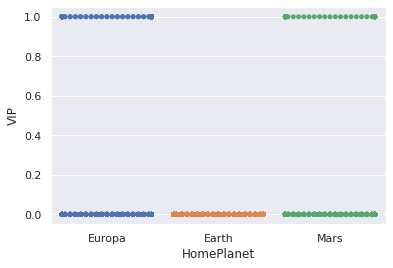

In [118]:
sb.swarmplot(x='HomePlanet',y='VIP',data=dataset)

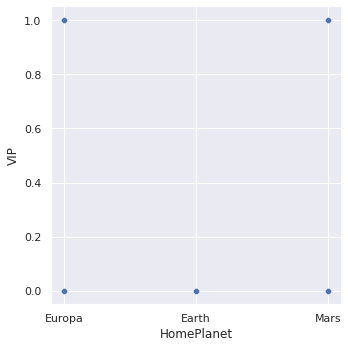

In [119]:
sb.relplot(x='HomePlanet',y='VIP',data=dataset)

In [120]:
# allocating feature from dataset 1
dataset.info()
# train_data_features=dataset.iloc[:,[]]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [121]:
dataset.HomePlanet.fillna(dataset.HomePlanet.mean,inplace=True)
dataset2.HomePlanet.fillna(dataset2.HomePlanet.mean,inplace=True)
# dataset.CryoSleep.fillna(dataset. CryoSleep.mean,inplace=True)
dataset.isnull().sum()


PassengerId       0
HomePlanet        0
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [ ]:
def f(s):
    if(s=='Europa'):
        return 0
    elif(s=='Earth'):
        return 1
    else:
      return 2
      

dataset['HomePlanet']=dataset.HomePlanet.apply(f)
dataset2['HomePlanet']=dataset2.HomePlanet.apply(f)
dataset.head(30)

In [123]:
# applying it on all cases where their is true false cases
def f(s):
    if(s==False):
        return 0
    else:
        return 1

dataset['CryoSleep']=dataset.CryoSleep.apply(f)
dataset2['CryoSleep']=dataset2.CryoSleep.apply(f)
dataset['VIP']=dataset.VIP.apply(f)
dataset2['VIP']=dataset2.VIP.apply(f)
dataset['Transported']=dataset.Transported.apply(f)
# dataset2['Transported']=dataset2.Transported.apply(f)

dataset.head(20)
dataset.fillna("0",inplace=True)
dataset2.fillna("0",inplace=True)

In [124]:
# dataset.head()
# x_train_features.info()

In [125]:
# handling empty values
dataset.Age.fillna(dataset.Age.mean,inplace=True)
dataset2.Age.fillna(dataset2.Age.mean,inplace=True)
# dataset['Age']>50

In [126]:
dataset.isnull().sum()
x_train_features=dataset.iloc[:,[1,2,3,4,5,6,7,8,9,10]]
x_test_features=dataset2.iloc[:,[1,2,3,4,5,6,7,8,9,10]]
y_train=dataset.iloc[:,-1]
x_train_features.columns


Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa'],
      dtype='object')

In [127]:
# # dealing with missing values
# from sklearn.impute import SimpleImputer
# imputer=SimpleImputer(missing_values=np.nan)
# a=x_train_features.iloc[:,[4]]
# np.array(a)
# # a=[[4,5,6,np.nan]]
# # imputer.fit(a)
# # print(imputer.transform([[4,6,7,np.nan]]))

In [128]:
x_train_features.isnull().sum()
x_train_features.columns

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa'],
      dtype='object')

In [129]:
print(y_train)

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


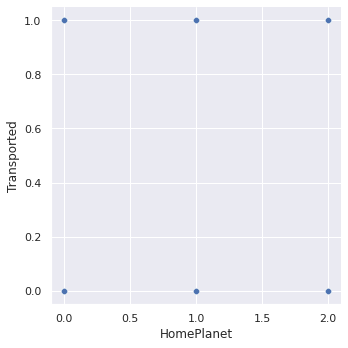

In [130]:
# visualising the relationship between different aaray

sb.relplot(x_train_features.HomePlanet,y_train,kind='scatter')

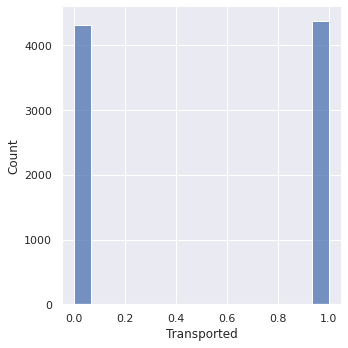

In [131]:
# people who are transported and who are not
sb.displot(x=y_train)

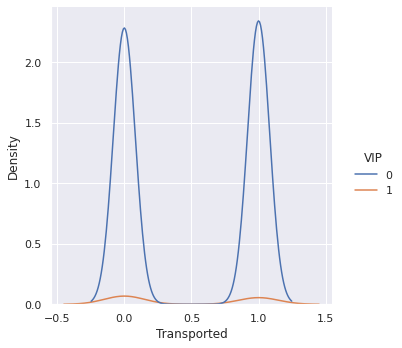

In [132]:
sb.displot(x=y_train,kind='kde',hue=x_train_features["VIP"])
# here we can notice the peak=mean lie around 0 and 1
# also the no of vip are less as compared to non vip

In [133]:
# sb.regplot(y=y_train,x='Age',data=dataset)


In [134]:
# A histogram aims to approximate the underlying probability density function that generated the data by binning and counting observations. Kernel density 
# estimation (KDE) presents a different
#  solution to the same problem. Rather than using discrete bins, a KDE plot smooths the observations with a Gaussian kernel, producing a continuous density estimate:
# sb.displot(x=y_train,y='Age',data=dataset,kind='kde')
# here we can observe that child and people with age around 20 are more transported 

In [135]:
# sb.displot(x=y_train,y='Spa',data=dataset,kind='kde')

In [135]:

# hyper parameter tuning

In [136]:
# x_train_features.info()
# heat_map=sb.heatmap(x_train_features.iloc[:,[0,1,5,6,7,8,9]])
dataset.corr()

,HomePlanet,CryoSleep,VIP,Transported
HomePlanet,1.000000,-0.040207,-0.040812,-0.098939
CryoSleep,-0.040207,1.000000,-0.050342,0.451744
VIP,-0.040812,-0.050342,1.000000,-0.024602
Transported,-0.098939,0.451744,-0.024602,1.000000


In [137]:
x_train_features.isnull().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
dtype: int64

In [138]:
x_train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   HomePlanet    8693 non-null   int64 
 1   CryoSleep     8693 non-null   int64 
 2   Cabin         8693 non-null   object
 3   Destination   8693 non-null   object
 4   Age           8693 non-null   object
 5   VIP           8693 non-null   int64 
 6   RoomService   8693 non-null   object
 7   FoodCourt     8693 non-null   object
 8   ShoppingMall  8693 non-null   object
 9   Spa           8693 non-null   object
dtypes: int64(3), object(7)
memory usage: 679.3+ KB


In [ ]:
# outlier handling


In [139]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_features.iloc[:,[4]] = sc.fit_transform(x_train_features.iloc[:,[4]])
x_test_features.iloc[:,[4]] = sc.fit_transform(x_test_features.iloc[:,[4]])

# x_test_features = sc.transform(x_test_features)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [140]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(random_state=0,criterion='entropy')
classifier.fit(x_train_features.iloc[:,[0,1,5]],y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [156]:
y_pred=classifier.predict(x_test_features.iloc[:,[0,1,5]])
print(y_pred.shape)
print(x_test_features.shape)

(4277,)
(4277, 10)


In [150]:
print(y_pred.shape)
print(y_test.shape)

(8693,)
(4277, 1)


In [158]:
from sklearn.metrics import confusion_matrix 
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[2649 1628]
 [   0    0]]


In [168]:
y_test

,Transported
0,0
1,0
2,0
3,0
4,0
...,...
4272,0
4273,0
4274,0
4275,0


In [173]:
# accuracy score
from sklearn.model_selection import cross_val_score
accuracy=cross_val_score(classifier,x_train_features.iloc[:,[0,1,5]],y_train, cv=5)
print("accuracy: {:.2f} %".format(accuracy.mean()*100))
# print("Standard Deviation: {:.2f} %".format(accuracy.std()*100))

accuracy: 71.82 %


In [174]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

-0.6145715364288413

In [177]:
output=pd.DataFrame({'PassengerId' : dataset3.PassengerId,'Transported':y_pred})

output.head()


,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,0
4,0023_01,0


In [179]:
def f(s):
    if(s==1):
        return True
    else:
      return False
output['Transported']=output.Transported.apply(f)
      

In [180]:
output.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False


In [181]:
output.to_csv('my_pred.csv',index=False)